In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
url

'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'

In [3]:
# Load the data
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
766,2014,MERCEDES-BENZ,ML 63 AMG 4MATIC,SUV - STANDARD,5.5,8,AS7,Z,17.2,13.5,15.5,18,356
509,2014,HYUNDAI,SANTA FE 4WD,SUV - SMALL,3.3,6,A6,X,13.3,9.5,11.6,24,267
273,2014,CHEVROLET,TRAX AWD,SUV - SMALL,1.4,4,AS6,X,10.0,7.8,9.0,31,207
428,2014,FORD,TRANSIT CONNECT,SPECIAL PURPOSE VEHICLE,1.6,4,AS6,X,10.8,8.0,9.5,30,218
553,2014,JAGUAR,XFR,MID-SIZE,5.0,8,AS8,E,21.3,14.1,18.1,16,290


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# select features
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
432,3.6,6,12.3,283
776,5.5,8,10.7,246
210,4.3,6,15.1,347
355,3.7,6,12.2,281
823,2.0,4,8.6,198
18,5.9,12,15.6,359
581,2.4,4,10.2,235
400,2.0,4,8.9,205
851,3.5,6,10.6,244


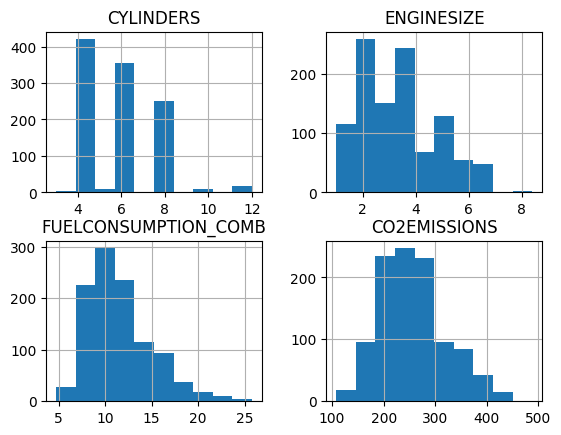

In [6]:
# visualizing features
viz = cdf[['CYLINDERS', 'ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist()
plt.show()

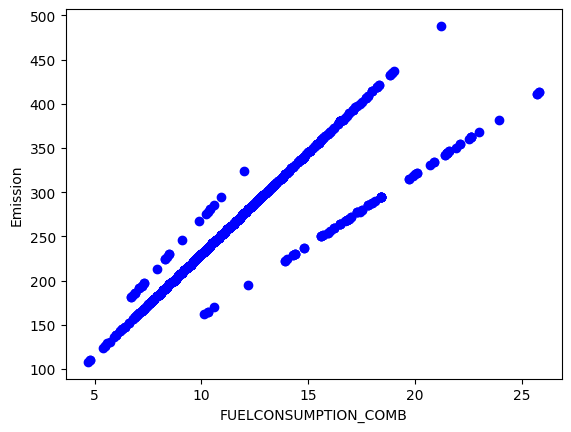

In [7]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('Emission')
plt.show()

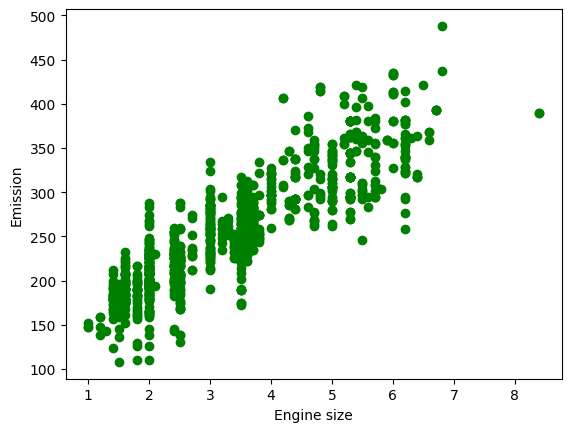

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'green')
plt.xlabel('Engine size')
plt.ylabel('Emission')
plt.show()

<Axes: xlabel='CYLINDERS', ylabel='CO2EMISSIONS'>

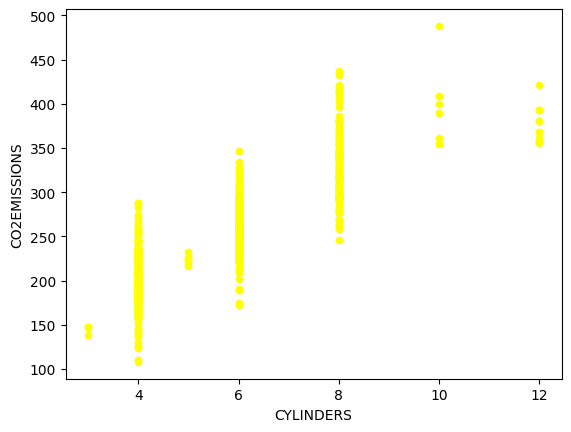

In [9]:
cdf.plot.scatter(x = 'CYLINDERS', y = 'CO2EMISSIONS', color = 'yellow')

In [10]:
x = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [11]:
# 80% of the dataset for training and remaining 20% for testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [12]:
type(x_train)

numpy.ndarray

In [13]:
np.shape(x_train)

(853,)

In [14]:
np.shape(x_test)

(214,)

In [15]:
# build a simple linear regression model
from sklearn import linear_model
# create a model object
regression = linear_model.LinearRegression()
# train the model on the training data
# x_train is a 1D array but sklearn models expect a 2D array as input for the training data
# so we need to reshape it. we can let it infer the number of observations using '-1'
regression.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

In [16]:
regression.coef_[0]

np.float64(38.992978724434074)

In [17]:
regression.intercept_

np.float64(126.28970217408721)

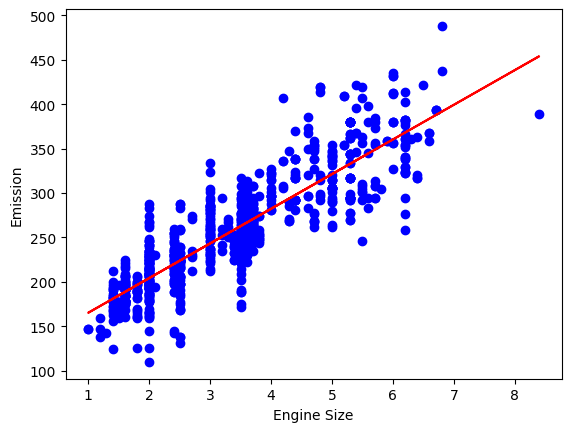

In [18]:
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, regression.coef_ * x_train + regression.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# use the predict method to make test predictions
y_test_ = regression.predict(x_test.reshape(-1, 1))
# evaluation
print('Mean absolute error: %.2f' % mean_absolute_error(y_test, y_test_))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_test_))
print('Root mean squared error: %.2f' % np.sqrt(mean_squared_error(y_test, y_test_)))
print('R2-score: %.2f' % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


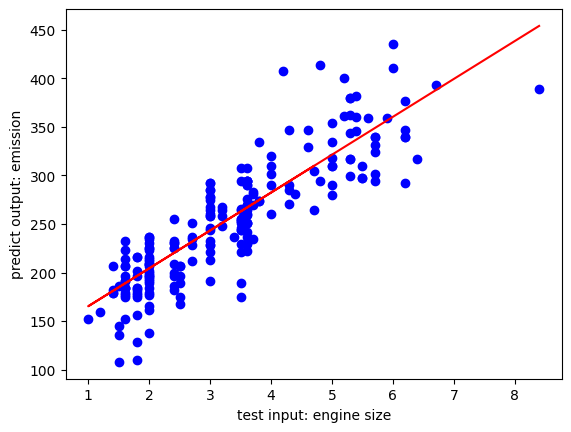

In [21]:
plt.plot(x_test, y_test_, '-r')
plt.scatter(x_test, y_test, color = 'blue')
plt.xlabel('test input: engine size')
plt.ylabel('predict output: emission')
plt.show()

Coefficient:  16.18
Intercept:  69.1


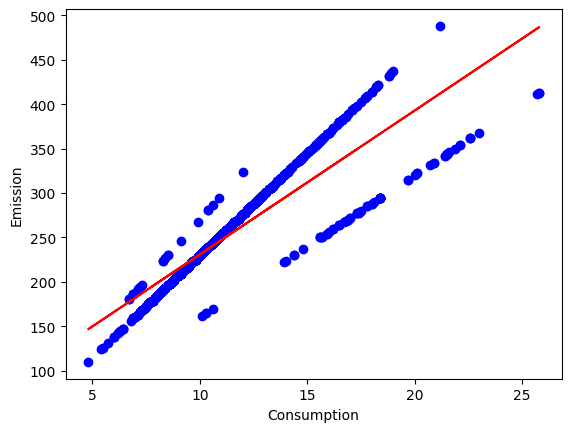

In [29]:
# use of consumption feature and generate a single regression model
x = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
regression = linear_model.LinearRegression()
regression.fit(x_train.reshape(-1, 1), y_train)
print('Coefficient: ', round(regression.coef_[0], 2))
print('Intercept: ', round(regression.intercept_, 2))
plt.scatter(x_train, y_train, color = 'blue')
plt.plot(x_train, x_train * regression.coef_[0] + regression.intercept_, '-r')
plt.xlabel('Consumption')
plt.ylabel('Emission')
plt.show()

In [30]:
y_test_ = regression.predict(x_test.reshape(-1, 1))
mean_squared_error(y_test, y_test_)

797.4346310097205